In [153]:
import cv2
import os
import pandas as pd
import numpy as np
from glob import glob
#imports

In [154]:
img_path = os.path.join('bird.jpg')
img_path #storing the image path


'bird.jpg'

In [155]:
img = cv2.imread(img_path)
height, width, channels = img.shape #getting dimensions of the image

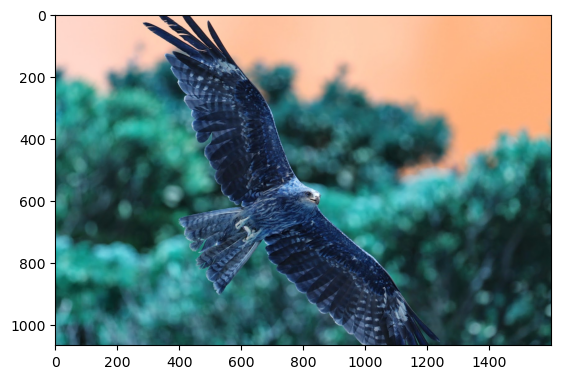

In [156]:
from matplotlib import pyplot as plt

plt.imshow(img) #show the image, not correct colors

In [157]:
recolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Blue, Green, Red to --> RGB 

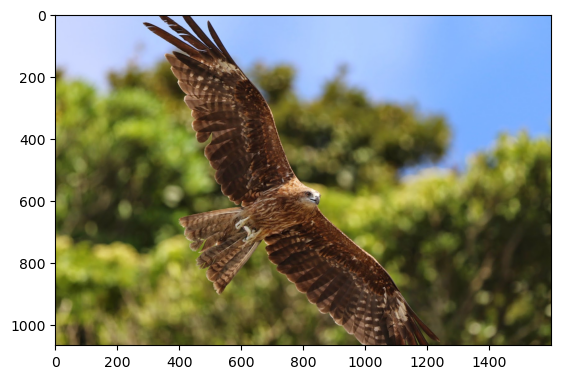

In [158]:
plt.imshow(recolor) #correct colors
plt.show()

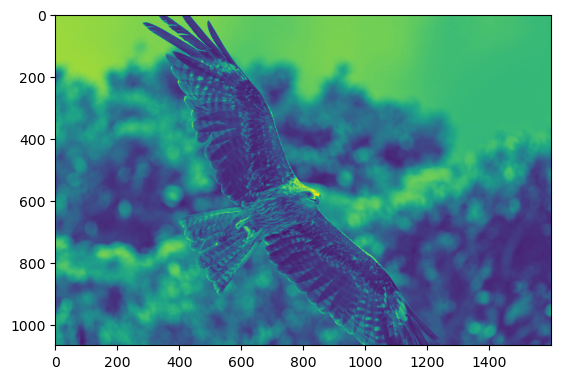

In [159]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #image colors to --> gray
plt.imshow(gray)
plt.show()

In [160]:
cv2.imwrite('graybird.jpg', gray) #download image to jupyter notebook

True

In [161]:
(int(img.shape[1]/3), int(img.shape[0]/3)) #resize image by dividing height and length by 3

(533, 355)

In [162]:
r_img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2))) #resized image
cv2.imshow('Frame View', r_img) 
cv2.waitKey(0)
cv2.destroyAllWindows()
#pops up image in another tab and if any button is pressed it closes

In [163]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, threshold1=180, threshold2=200) #making variable

In [164]:
r_img = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2))) #resized image with black and white lines
cv2.imshow('Frame View', r_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [165]:
cv2.imwrite('birdedges.jpg', canny)

True

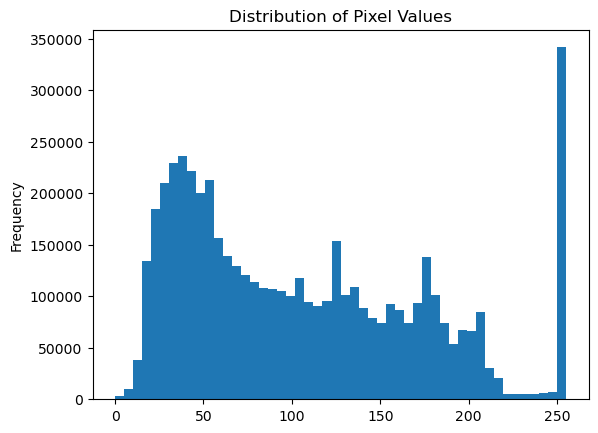

In [166]:
img.flatten()

pd.Series(img.flatten()).plot(kind='hist', bins = 50, title = 'Distribution of Pixel Values')
plt.show() #distribution of pixel values histogram

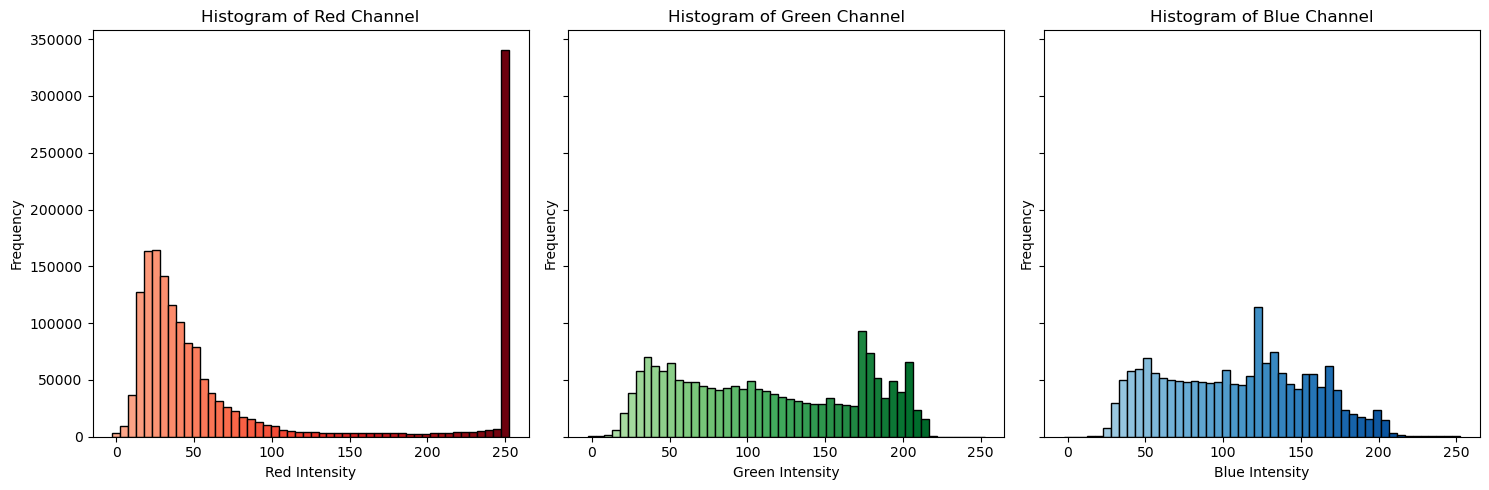

In [176]:
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey = True) #create subplot that shares y axis values, 1x3

#pd.Series(img[:,:,0].flatten()).plot(kind='hist', bins = 50, ax=axs[0], title = 'Distribution of Pixel Values')
#pd.Series(img[:,:,1].flatten()).plot(kind='hist', bins = 50, ax=axs[1], title = 'Distribution of Pixel Values')
#pd.Series(img[:,:,2].flatten()).plot(kind='hist', bins = 50, ax=axs[2], title = 'Distribution of Pixel Values')
#Graphs with no color, plain



# Iterate over each channel (R, G, B)
for i, color in enumerate(['red', 'green', 'blue']):
    # Flatten the pixel values of the channel
    channel_values = img[:,:,i].flatten()
    
    # Calculate histogram bins and frequencies
    hist, bins = np.histogram(channel_values, bins=50, range=(0, 255))
    
    # Choose colormap based on channel
    if color == 'red':
        colors = plt.cm.Reds(np.linspace(0.3, 1, len(bins)))
    elif color == 'green':
        colors = plt.cm.Greens(np.linspace(0.3, 1, len(bins)))
    elif color == 'blue':
        colors = plt.cm.Blues(np.linspace(0.3, 1, len(bins)))
    else:
        colors = plt.cm.Reds(np.linspace(0.3, 1, len(bins)))  # Default to Reds
    
    # Plot the histogram with custom colored bars on the respective subplot
    axs[i].bar(bins[:-1], hist, width=np.diff(bins), color=colors, edgecolor='black')
    
    # Set subplot labels and title
    axs[i].set_xlabel(f'{color.capitalize()} Intensity')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {color.capitalize()} Channel')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#make histograms of each red, green, blue channels and make the color intensity increase as the graph does aswell

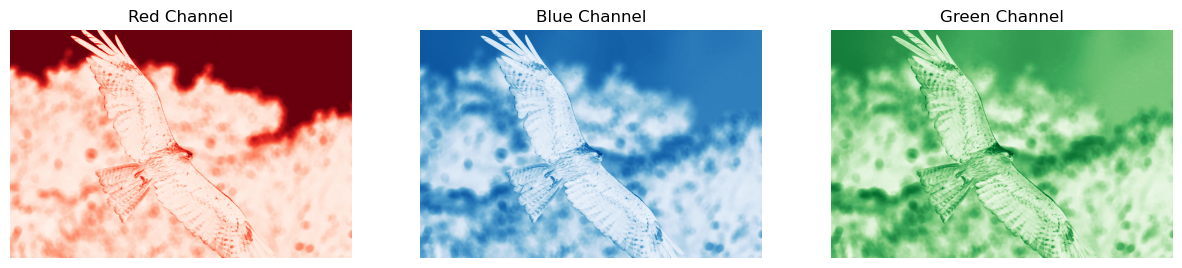

In [177]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(img[:,:,0], cmap='Reds')
axs[1].imshow(img[:,:,1], cmap='Blues')
axs[2].imshow(img[:,:,2], cmap='Greens')
axs[0].axis('off') #REMOVE AXIS
axs[1].axis('off') #REMOVE AXIS
axs[2].axis('off') #REMOVE AXIS
axs[0].set_title('Red Channel')
axs[1].set_title('Blue Channel')
axs[2].set_title('Green Channel')
plt.show()
#prints the red, blue, green parts of each image